In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\train_data\\train.csv"
df_train = pd.read_csv(train_data_path)

In [3]:
test_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\test_data\\test.csv"
df_test = pd.read_csv(test_data_path)

# EDA

In [5]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2022-12-31 23:10:00,6.9,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,4,173.77,1.8,92.63
210236,2022-12-31 23:20:00,6.8,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,7,175.77,1.8,93.26
210237,2022-12-31 23:30:00,6.8,5.8,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.31,1.8,93.26
210238,2022-12-31 23:40:00,6.8,5.6,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.36,1.8,91.95


In [7]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df_train.dtypes

Timestamp             datetime64[ns]
Temperature                  float64
Dew Point                    float64
Surface Albedo               float64
Pressure                       int64
Wind Direction                 int64
Wind Speed                   float64
Clearsky DHI                   int64
Clearsky DNI                   int64
Clearsky GHI                   int64
Fill Flag                      int64
Ozone                        float64
Cloud Type                     int64
Solar Zenith Angle           float64
Precipitable Water           float64
Relative Humidity            float64
dtype: object

Cloud Type


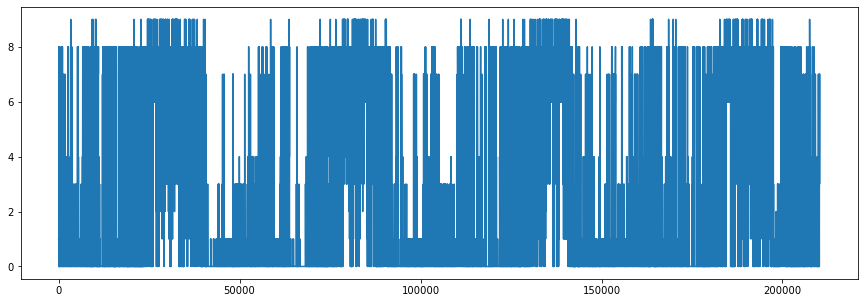

Dew Point


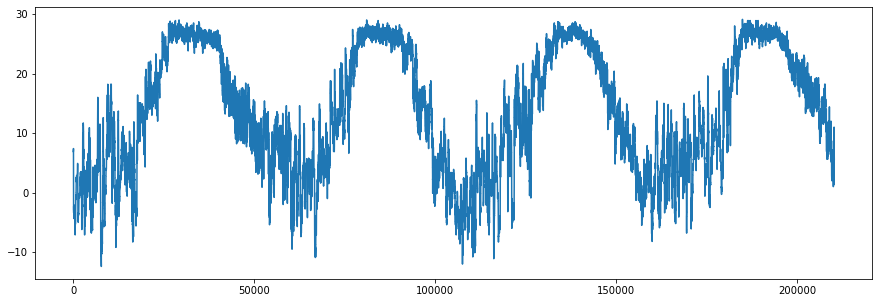

Temperature


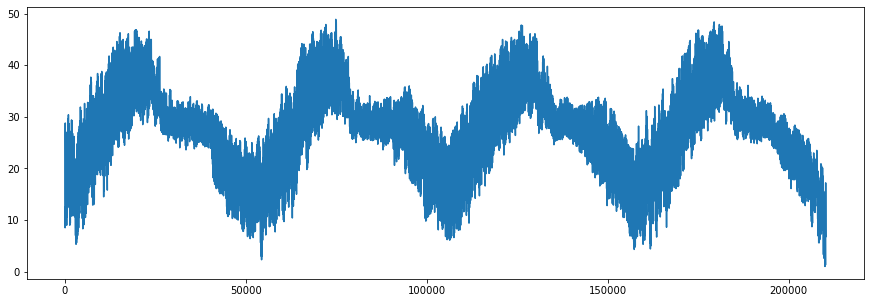

Pressure


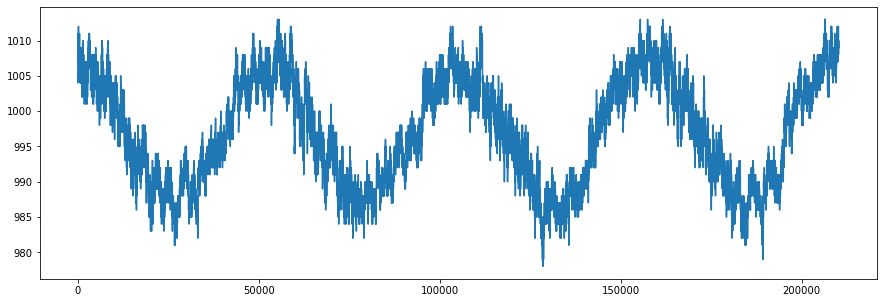

Relative Humidity


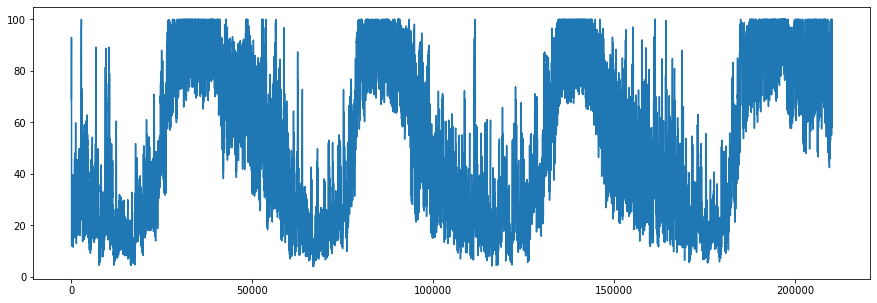

Ozone


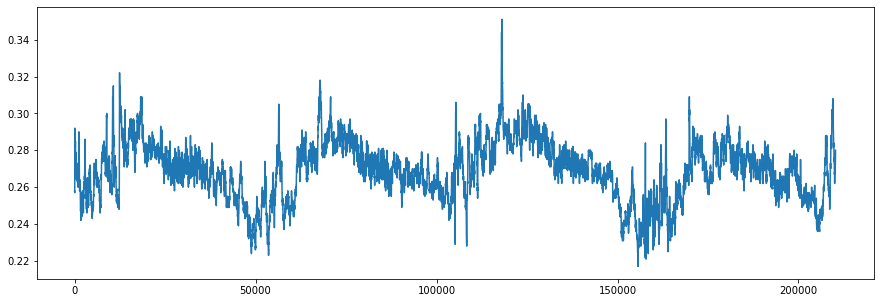

Solar Zenith Angle


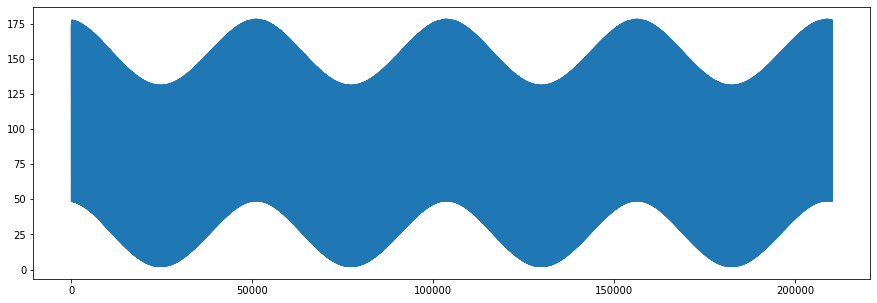

Surface Albedo


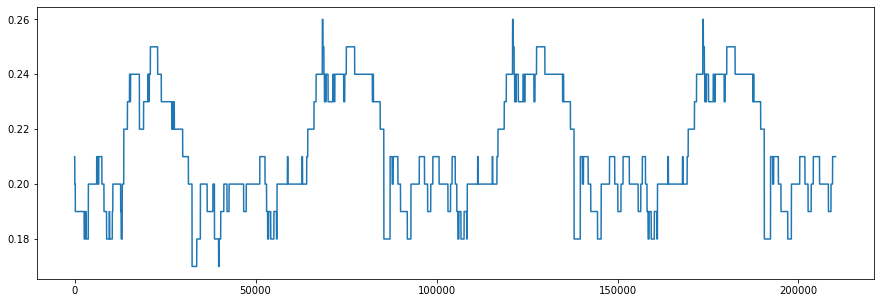

Precipitable Water


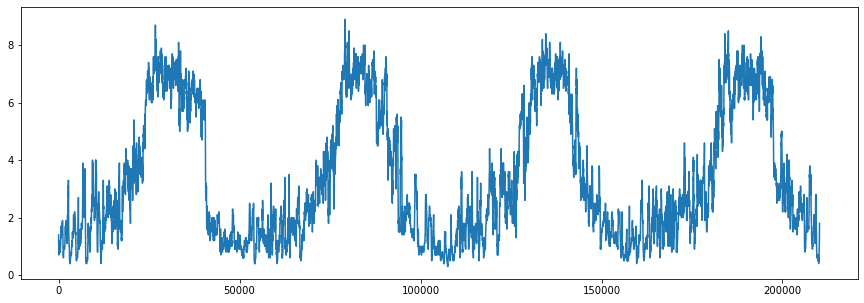

Wind Direction


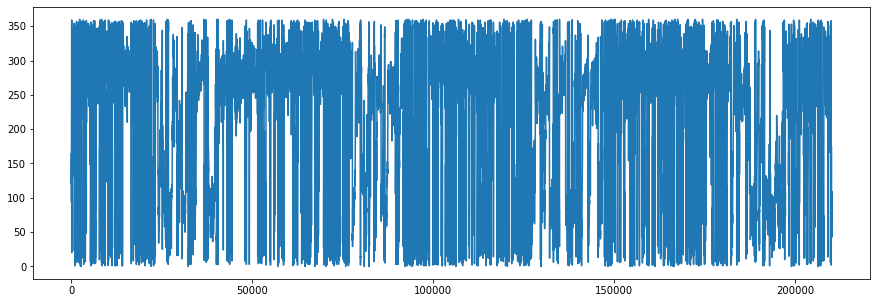

Wind Speed


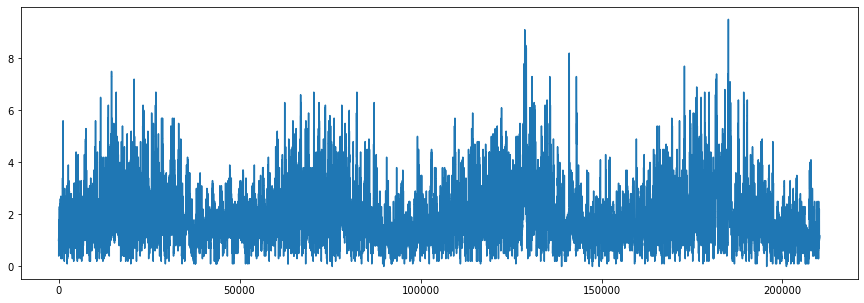

Fill Flag


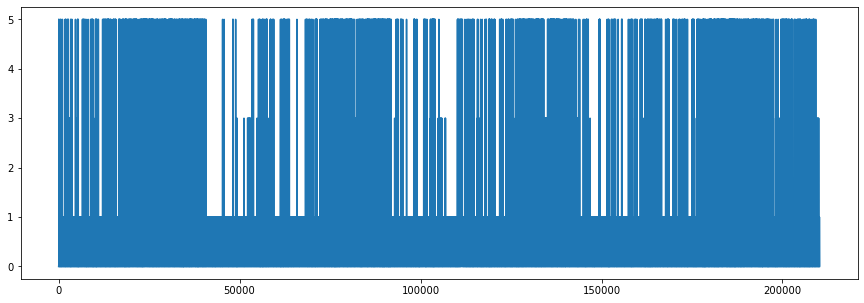

In [13]:
feature_cols = ['Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Ozone','Solar Zenith Angle','Surface Albedo','Precipitable Water','Wind Direction','Wind Speed','Fill Flag']

for col in feature_cols:
    print(col)
    plt.figure(figsize=(15, 5))
    df_train[col].plot()
    plt.show()

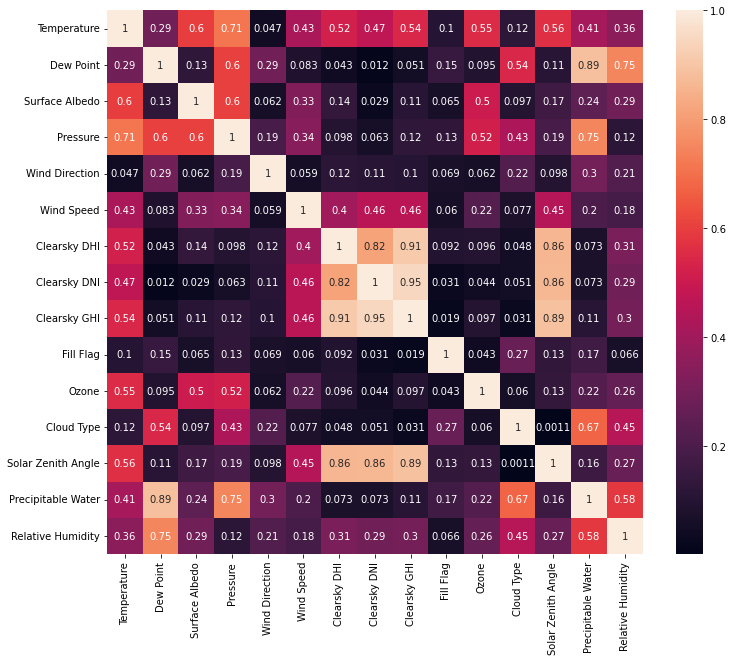

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr().abs(), annot=True)
plt.show()

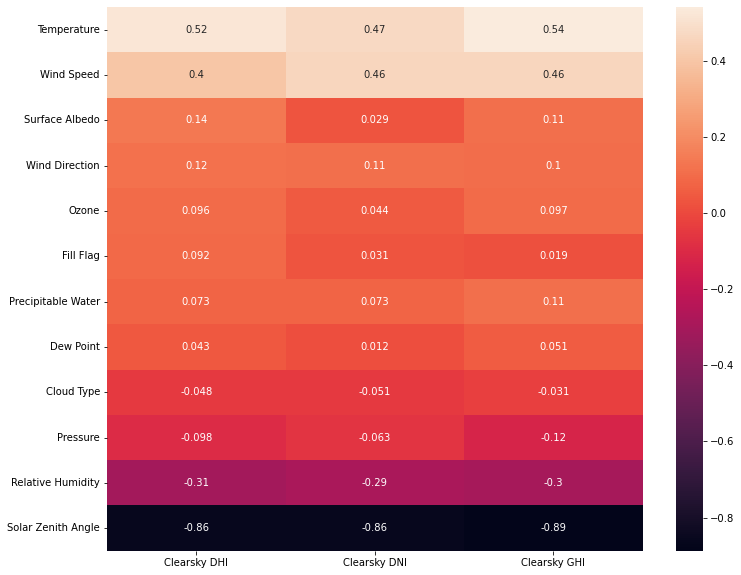

In [15]:
target_cols = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr()[target_cols].drop(target_cols).sort_values(target_cols, ascending=False), annot=True)
plt.show()

In [16]:
df_train['GHI_cal'] = df_train['Clearsky DNI']*np.cos(np.radians(df_train['Solar Zenith Angle'])) + df_train['Clearsky DHI']

In [17]:
df_train.head(50)

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,GHI_cal
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82,0.000000
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73,0.000000
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65,0.000000
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11,0.000000
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91,0.000000
5,2019-01-01 00:50:00,11.6,6.9,0.21,1005,128,1.0,0,0,0,0,0.258,1,162.89,1.3,72.87,0.000000
6,2019-01-01 01:00:00,11.4,6.9,0.21,1005,129,1.0,0,0,0,0,0.258,1,160.63,1.3,73.83,0.000000
7,2019-01-01 01:10:00,11.3,6.9,0.21,1005,131,1.0,0,0,0,0,0.258,1,158.38,1.3,74.32,0.000000
8,2019-01-01 01:20:00,11.1,6.9,0.21,1005,133,1.0,0,0,0,0,0.258,1,156.12,1.3,75.31,0.000000
9,2019-01-01 01:30:00,10.9,6.9,0.21,1004,135,1.1,0,0,0,0,0.258,1,153.87,1.3,76.24,0.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

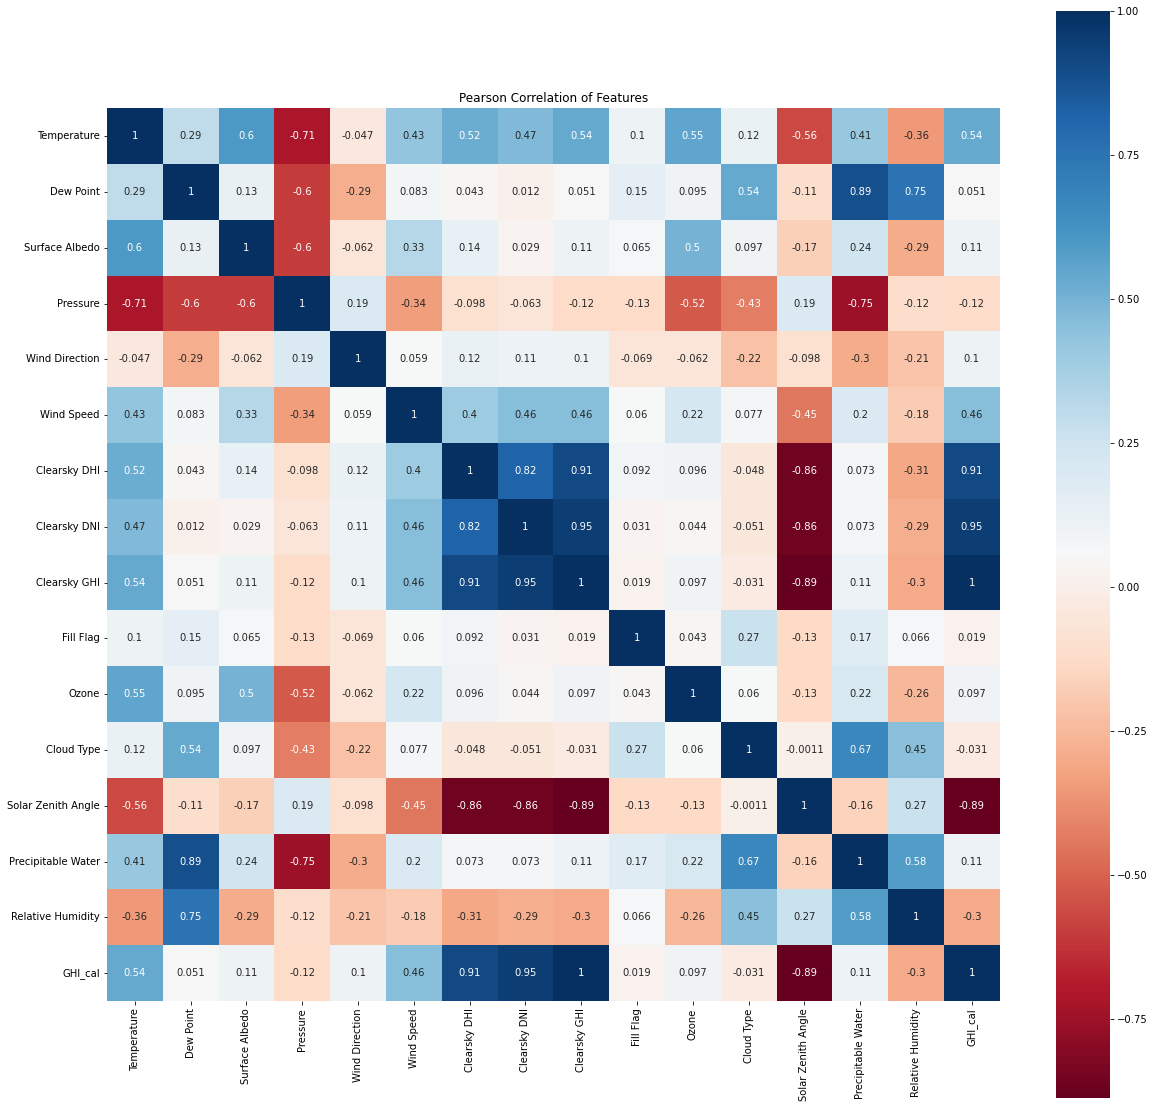

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features')
sns.heatmap(df_train.corr(), square=True, cmap=colormap, annot=True)

GHI, DNI, DHI have high correlation with Solar Zenith Angle.<br>
Moderate Correlation Temperature & Wind Speed.<br>
Temperature has high correlation with pressure & surface albedo and moderate correlaton with Precipitable Water.<br>
Precipitable Water has High correlation with Dew Point & Pressure and moderately correlated with relative humidity, cloud type.

In [23]:
from matplotlib import dates as mpl_dates

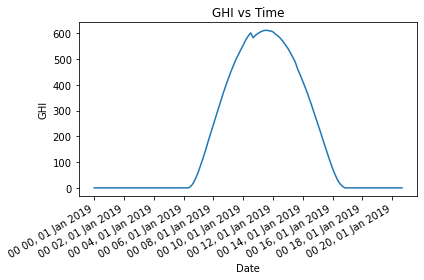

In [27]:
plt.plot(df_train['Timestamp'][0:125], df_train['Clearsky GHI'][0:125])
plt.title('GHI vs Time')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%M %H, %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()